In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Insurance Data.csv to Insurance Data.csv


In [ ]:
import pandas as pd
data=pd.read_csv("/content/Insurance Data.csv")

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
Y=data["charges"]
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
X=data[["age","bmi","children"]]

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [ ]:
reg.fit(X,Y)

LinearRegression()

In [ ]:
reg.intercept_

-6916.243347787033

In [ ]:
reg.coef_

array([239.99447429, 332.0833645 , 542.86465225])

In [ ]:
reg.score(X,Y)

0.12009819576246927

In [ ]:
import statsmodels.api as sm

#add constant to predictor variables
x = sm.add_constant(X)

#fit linear regression model
reg = sm.OLS(Y, x).fit()

#view model summary
print(reg.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           8.80e-37
Time:                        19:40:31   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6916.2433   1757.480     -3.935      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#age(Beta1)=239.9945       
#bmi(Beta2)=332.0834     
#children(Beta3)=542.8647
##Beta3>Beta2>Beta1  Children have more effect on the charges

##R-squared:  0.120  12% variability in our model
##Prob (F-statistic):  8.80e-37  this value is less than 0.05 so model is statistically significant
##age:   0.000
##bmi:      0.000 
##children:  0.036   
##Here all independent variable are statistically significant because values is less than 0.05
   

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
CatVar=["sex","smoker","region"]
data = pd.get_dummies(data, columns=CatVar, drop_first=False)

In [ ]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


#Step wise regression

In [ ]:
Y=data["charges"]
X=data[["age","bmi","children","sex_female","smoker_yes","region_northeast","region_northwest","region_southeast"]]

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [ ]:
from statsmodels.formula.api import ols

#fit linear regression model
reg = ols("Y~X",data).fit()

#view model summary
print(reg.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:40:37   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.303e+04   1032.967    -12.614      0.0

#By taking all variables two variables comes out to be statistically insignificant sex_female and region_southwest

In [ ]:
Y=data["charges"]
X=data[["age","bmi","children","smoker_yes","region_northeast","region_northwest","region_southeast"]]

In [ ]:
from statsmodels.formula.api import ols

#fit linear regression model
reg = ols("Y~X",data).fit()

#view model summary
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:40:39   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.295e+04   1012.403    -12.791      0.0

#Now region_northwest & region_northwest is statistically insignificant

In [ ]:
Y=data["charges"]
X=data[["age","bmi","children","smoker_yes"]]

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [ ]:
from statsmodels.formula.api import ols

#fit linear regression model
reg = ols("Y~X",data).fit()

#view model summary
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:40:52   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.21e+04    941.984    -12.848      0.0

#Finally we gets statistically significant model with these independent variables
age:              0.000 
bmi:              0.000 
children:         0.001 
smoker_yes:       0.000


all are having p-vlue less than 0.05



In [ ]:
y_pred=reg.predict(X)

In [ ]:
residual=Y-y_pred

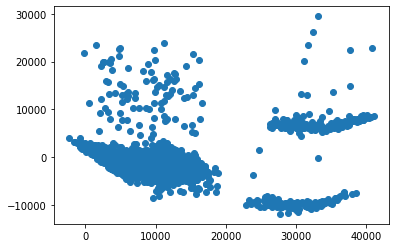

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,residual)

In [ ]:
data=pd.read_csv("/content/Insurance Data.csv")

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
A=data["age"]
B=data["charges"]

In [ ]:
print(B.shape)

(1338,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


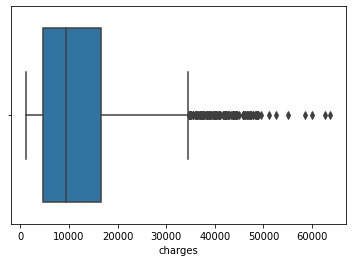

In [ ]:
import seaborn as sns
sns.boxplot(B)

#Outlier formula is Q3 + 1.5*IQR highest thresold value Q1-1.5*IQR lowest thresold value and IQR=Q3-Q1

In [ ]:
print(Drop)

[14, 19, 23, 29, 30, 34, 38, 39, 49, 53, 55, 57, 62, 82, 84, 86, 92, 94, 103, 109, 115, 123, 128, 146, 158, 161, 175, 185, 203, 223, 240, 242, 251, 252, 254, 256, 259, 263, 265, 271, 281, 288, 292, 298, 312, 314, 322, 327, 328, 330, 338, 373, 377, 381, 387, 420, 421, 422, 441, 476, 488, 500, 503, 524, 530, 543, 549, 558, 569, 573, 577, 587, 599, 609, 615, 618, 621, 623, 629, 641, 665, 667, 668, 674, 677, 682, 689, 697, 706, 725, 736, 738, 739, 742, 759, 803, 819, 826, 828, 842, 845, 850, 852, 856, 860, 883, 893, 901, 911, 917, 936, 947, 951, 953, 956, 958, 1001, 1012, 1021, 1022, 1031, 1036, 1037, 1042, 1047, 1049, 1062, 1070, 1078, 1090, 1093, 1096, 1111, 1117, 1118, 1120, 1122, 1124, 1139, 1146, 1152, 1156, 1186, 1196, 1206, 1207, 1218, 1230, 1240, 1241, 1249, 1258, 1267, 1284, 1288, 1291, 1300, 1301, 1303, 1308, 1313, 1323]


In [ ]:
Drop=[]
for i in range(B.shape[0]):
  if Y[i]>=30000: 
    print(i)
    Drop.append(i)
data=data.drop(labels=Drop, axis=0)
print(data)

14
19
23
29
30
34
38
39
49
53
55
57
62
82
84
86
92
94
103
109
115
123
128
146
158
161
175
185
203
223
240
242
251
252
254
256
259
263
265
271
281
288
292
298
312
314
322
327
328
330
338
373
377
381
387
420
421
422
441
476
488
500
503
524
530
543
549
558
569
573
577
587
599
609
615
618
621
623
629
641
665
667
668
674
677
682
689
697
706
725
736
738
739
742
759
803
819
826
828
842
845
850
852
856
860
883
893
901
911
917
936
947
951
953
956
958
1001
1012
1021
1022
1031
1036
1037
1042
1047
1049
1062
1070
1078
1090
1093
1096
1111
1117
1118
1120
1122
1124
1139
1146
1152
1156
1186
1196
1206
1207
1218
1230
1240
1241
1249
1258
1267
1284
1288
1291
1300
1301
1303
1308
1313
1323
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


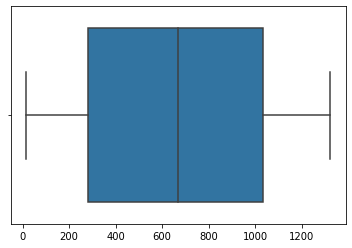

In [ ]:
B=Drop
sns.boxplot(B)


Text(0, 0.5, 'Residual')

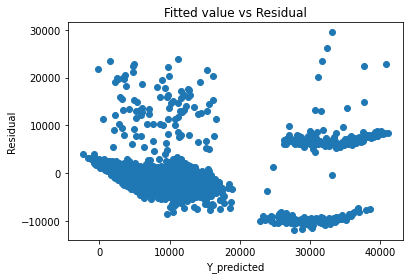

In [ ]:
#Residual vs predicted
#testing linearity-->There is no linearity between residual and predicted value
plt.scatter(y_pred,residual)
plt.title("Fitted value vs Residual")
plt.xlabel("Y_predicted")
plt.ylabel("Residual")

(array([119., 140., 647., 188., 153.,  27.,  32.,  19.,  11.,   2.]),
 array([-11897.94482596,  -7757.18972319,  -3616.43462041,    524.32048237,
          4665.07558515,   8805.83068793,  12946.58579071,  17087.34089349,
         21228.09599627,  25368.85109905,  29509.60620183]),
 <a list of 10 Patch objects>)

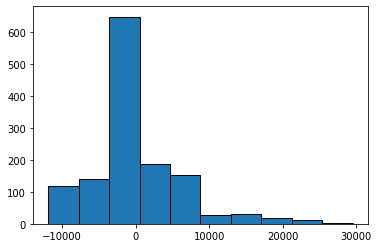

In [ ]:
#Testing normality if erro
plt.hist(residual, edgecolor='black', bins=10)

In [ ]:
#No Multicollinearity among PredictorsPermalink
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X_VIF = data[["age", "bmi", "children"]]
X_VIF


,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [ ]:
#if value b/w correlation is less than 0.5 no problem
corr=X_VIF.corr()
print(corr)

               age       bmi  children
age       1.000000  0.122240  0.025965
bmi       0.122240  1.000000  0.003858
children  0.025965  0.003858  1.000000


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X_VIF =data[["age", "bmi", "children"]]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_VIF.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_VIF.values, i)
                          for i in range(len(X_VIF.columns))]
  
print(vif_data) # if value greater than 10 than there will be problem Otherwise not

    feature       VIF
0       age  7.583324
1       bmi  7.924975
2  children  1.761431


               age       bmi  children
age       1.000000  0.122240  0.025965
bmi       0.122240  1.000000  0.003858
children  0.025965  0.003858  1.000000


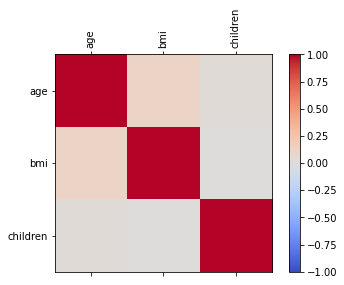

In [ ]:
import numpy as np
corr = X_VIF.corr()
print (corr)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X_VIF.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X_VIF.columns)
ax.set_yticklabels(X_VIF.columns)
plt.show()

In [ ]:
#No Autocorrelation of the Error TermsPermalink
#Durbin Watson test
#Idealy it should be in betwenn 1.5 to 2.5 

#if durbinWatson < 1.5
#Signs of positive autocorrelation', '\n')


#if durbinWatson > 2.5:
#Signs of negative autocorrelation

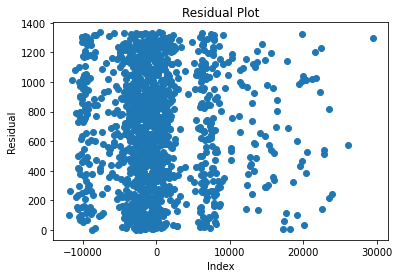

In [ ]:
#Homoscedasticity
plt.scatter(residual,residual.index)
plt.title("Residual Plot")
plt.xlabel("Index")
plt.ylabel("Residual")
plt.show()